In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

C:\Users\SOURABH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\SOURABH\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('booking.csv')

In [3]:
df_original = df.copy()

In [4]:
y = df_original['booking_status']

In [5]:
X = df_original.drop(columns='booking_status',axis=1)

In [6]:
X.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: booking_status, dtype: int64

In [8]:
y.value_counts()

booking_status
0    25596
1    16504
Name: count, dtype: int64

#### Question:
Based on the dataset provided, how many bookings are recorded where both the number of adults and the number of children are zero?

In [9]:
df_original[(df_original['no_of_adults']==0) & (df_original['no_of_children']==0)].shape

(16, 19)

In [10]:
df[df['no_of_adults']==0][['no_of_children']].value_counts()

no_of_children
2                 147
0                  16
1                   2
3                   2
Name: count, dtype: int64

In [11]:
pd.pivot(data=df_original ,columns=['arrival_month','booking_status'])

id                                                       ...  \
arrival_month    1        7    12   10  8   6        10       9   4       ...   
booking_status    0        0    0    1   1   0        0        0   1   0  ...   
0               0.0      NaN  NaN  NaN NaN NaN      NaN      NaN NaN NaN  ...   
1               NaN      1.0  NaN  NaN NaN NaN      NaN      NaN NaN NaN  ...   
2               NaN      NaN  2.0  NaN NaN NaN      NaN      NaN NaN NaN  ...   
3               NaN      NaN  3.0  NaN NaN NaN      NaN      NaN NaN NaN  ...   
4               NaN      NaN  NaN  4.0 NaN NaN      NaN      NaN NaN NaN  ...   
...             ...      ...  ...  ...  ..  ..      ...      ...  ..  ..  ...   
42095           NaN      NaN  NaN  NaN NaN NaN      NaN      NaN NaN NaN  ...   
42096           NaN      NaN  NaN  NaN NaN NaN      NaN  42096.0 NaN NaN  ...   
42097           NaN  42097.0  NaN  NaN NaN NaN      NaN      NaN NaN NaN  ...   
42098           NaN      NaN  NaN  NaN NaN NaN      NaN      NaN NaN NaN  ...   
42099           NaN      NaN  NaN  NaN NaN NaN  42099.0      NaN NaN NaN  ...   

               no_of_special_requests                                       
arrival_month                      9   5   6   5    12  3   2       3   1   
booking_status                      1   1   1   0    1   0   1   0   1   1  
0                                 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
1                                 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
2                                 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
3                                 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
4                                 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
...                               ...  ..  ..  ..  ...  ..  ..  ..  ..  ..  
42095                             NaN NaN NaN NaN  2.0 NaN NaN NaN NaN NaN  
42096                             NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
42097                             NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
42098                             NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
42099                             NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  

[42100 rows x 408 columns]

#### Q2. Bookings per month

In [12]:
bar1 = df.groupby(['arrival_month','booking_status'])['booking_status'].value_counts().reset_index()
bar1

,arrival_month,booking_status,count
0,1,0,747
1,1,1,58
2,2,0,884
3,2,1,317
4,3,0,1577
5,3,1,624
6,4,0,1924
7,4,1,1082
8,5,0,1955
9,5,1,1337


<AxesSubplot:xlabel='arrival_month', ylabel='count'>

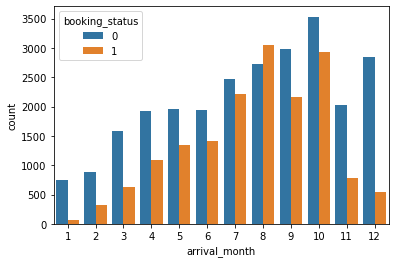

In [13]:
sns.barplot(data=bar1,x='arrival_month',y='count',hue='booking_status')

In [14]:
pd.pivot_table(df,  columns='booking_status')

booking_status,0,1
arrival_date,15.880645,15.937530
arrival_month,7.576184,7.620456
arrival_year,2017.806063,2017.934198
avg_price_per_room,99.869898,111.850132
id,20978.607790,21159.446498
lead_time,79.485466,141.733883
market_segment_type,0.671199,0.817378
no_of_adults,1.887092,1.972855
no_of_children,0.139553,0.143480
no_of_previous_bookings_not_canceled,0.287271,0.002848


In [15]:
pd.pivot_table(df, index='arrival_month', columns='booking_status', aggfunc='size', fill_value=0)

booking_status,0,1
arrival_month,,
1,747,58
2,884,317
3,1577,624
4,1924,1082
5,1955,1337
6,1945,1411
7,2463,2218
8,2722,3041
9,2981,2167


booking_status     0     1
arrival_month             
1                747    58
2                884   317
3               1577   624
4               1924  1082
5               1955  1337
6               1945  1411
7               2463  2218
8               2722  3041
9               2981  2167
10              3530  2923
11              2029   774
12              2839   552


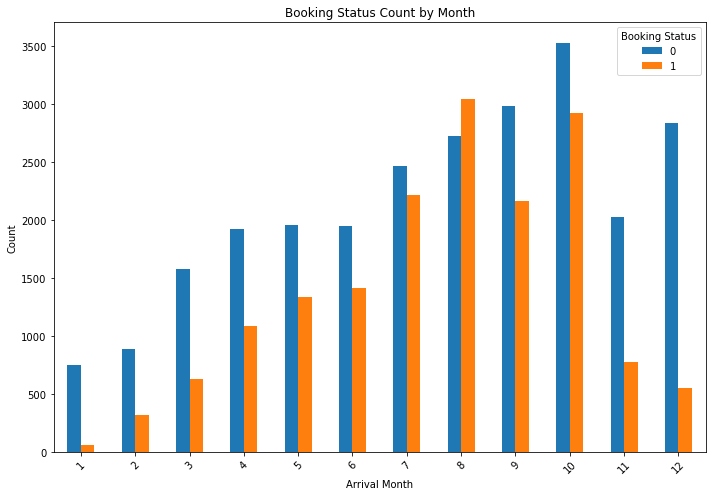

In [16]:
booking_status_counts = pd.pivot_table(df, index='arrival_month', columns='booking_status', aggfunc='size', fill_value=0) 
# Hint: Use 'arrival_month' and 'booking_status' columns and convert into pivot.

print(booking_status_counts)

# Plotting using the pivot table
booking_status_counts.plot(kind='bar', figsize=(10, 7)) # Hint: use bar plot
plt.title('Booking Status Count by Month')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

#### Q3. Datatime Engineering

In [17]:
# pd.to_datetime(temp[['year', 'month', 'day']], errors='coerce')
# ['year', 'month', 'day'] it has to be in this format(string).

In [18]:

def process_arrival_date(data):
    # Remove any pre-existing date columns that could conflict with the new transformations
    data.drop(columns=['year', 'month', 'day'], inplace=True, errors='ignore')

    # Renaming columns for uniformity
    temp = data.rename(columns={
        'arrival_year': 'year',
        'arrival_month': 'month',
        'arrival_date': 'day'
    })

    # TODO: Creating a datetime column from the year, month, and day columns
    data['date'] = pd.to_datetime(temp[['year', 'month', 'day']], errors='coerce')

    # TODO: Extract date features
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['week'] = data['date'].dt.isocalendar().week.astype(float)
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['dayofyear'] = data['date'].dt.dayofyear

    # Cleanup: Remove 'date' column after extracting necessary features
    data.drop(columns='date', inplace=True)
    return data

# Test the function by applying it to a DataFrame 'df'
new_processed_df = process_arrival_date(df)

# Display missing values in the newly created columns to check for any NaN entries
missing_values = new_processed_df.isna().sum()
print(missing_values)

id                                       0
no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
arrival_year                             0
arrival_month                            0
arrival_date                             0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
year                                    50
month                                   50
week                                    50
day                                     50
dayofweek  

####  Q5. Code Boosting Weights

#### Context:
Gradient Boosting is a sequential learning technique in regression and classification that builds models progressively, using an ensemble of weak prediction models like decision trees. It focuses on minimizing errors primarily through the use of pseudo residuals.

#### Task:
Complete the Python code provided to implement a simple boosting algorithm using two Decision Tree classifiers. Then, determine the accuracy of the combined model.

In [19]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize weights
np.ones(len(x)) / len(x)

NameError: name 'x' is not defined

In [ ]:
len(np.ones(len(x)) / len(x))

In [20]:
len(df)

42100

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize weights
weights = np.ones(len(X)) / len(X)

# Train first weak learner
dt1 = DecisionTreeClassifier(random_state=10, max_depth=1)
dt1.fit(X, y)
y_pred_1 = dt1.predict(X)

# Update weights function
def update_weights(y, y_pred, weights):
    for i in range(len(weights)):
        if y[i] != y_pred[i]: # Hint: If actual value is not same as predicted value.
            weights[i] *= 1.5  # Increase the weight for misclassified instances
        else:
            weights[i] *= 0.5  # Decrease the weight for correctly classified instances
    return weights / np.sum(weights)  # Normalize the weights

# Apply first learner and update weights
weights = update_weights(y, y_pred_1, weights) # Hint: update weights using actual and predicted.

# Train second weak learner
dt2 = DecisionTreeClassifier(random_state=10, max_depth=1)
dt2.fit(X, y, sample_weight= weights)   # Utilize updated weights for learning for this sample_weight is used.
y_pred_2 = dt2.predict(X)

# Combine the weak learners' predictions
# Assuming a simple average for combination of both the predictions
final_prediction = np.round((y_pred_1 + y_pred_2) / 2.0).astype(int)

# Calculate the accuracy
final_accuracy = accuracy_score(y, final_prediction)
print(f"Final combined prediction accuracy: {final_accuracy}")

Final combined prediction accuracy: 0.7140380047505939


#### Q7. Code Boosting resedual

#### Context:
Gradient Boosting is a sequential learning technique in regression and classification that builds models progressively, using an ensemble of weak prediction models like decision trees. It focuses on minimizing errors primarily through the use of pseudo residuals.

#### Task:
Complete the Python code provided below to implement a simple gradient boosting algorithm using pseudo residuals. You will fill in the missing parts of the code, run it, and determine the model's accuracy using mean squared error.

In [22]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

y_pred = np.full(shape=y.shape, fill_value=np.mean(y))

# Initialize pseudo residuals
pseudo_residuals = y - y_pred

learning_rate = 0.1

# Train first weak learner on pseudo residuals
dt1 = DecisionTreeRegressor(max_depth=1, random_state=10)
dt1.fit(X, pseudo_residuals)
y_pred_1 = dt1.predict(X)

# Update model predictions
y_pred += y_pred_1 * learning_rate # Hint: use learning rate.

# Calculate new pseudo residuals
pseudo_residuals = y - y_pred

# Train second weak learner on new pseudo residuals
dt2 = DecisionTreeRegressor(max_depth=1, random_state=10)
dt2.fit(X, pseudo_residuals)
y_pred_2 = dt2.predict(X)

# Update model predictions
y_pred += y_pred_2* learning_rate

# Calculate the accuracy using the mean squared error as a measure of accuracy for regression
final_accuracy = 1 - mean_squared_error(y, y_pred)
print(f"Final model accuracy: {final_accuracy}")

Final model accuracy: 0.7740567736555297


#### Q8. Boosting Accuracy

#### Context:
Effectively preprocessing data can significantly impact the performance of machine learning models. This task involves evaluating how a Gradient Boosting Classifier performs on both an original dataset and the same dataset after preprocessing and missing value removal.

#### Task:
Implement a Gradient Boosting Classifier and assess its accuracy on both the original and a preprocessed version of a dataset. This will help determine the impact of preprocessing on model performance.



In [23]:
new_processed_df

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,avg_price_per_room,no_of_special_requests,booking_status,year,month,week,day,dayofweek,quarter,dayofyear
0,0,2,0,0,2,1,0,0,9,2018,...,67.50,0,0,2018.0,1.0,2.0,14.0,6.0,1.0,14.0
1,1,2,0,1,2,0,0,0,117,2018,...,72.25,0,0,2018.0,7.0,30.0,29.0,6.0,3.0,210.0
2,2,2,0,0,1,0,0,0,315,2018,...,52.00,0,0,2018.0,12.0,48.0,2.0,6.0,4.0,336.0
3,3,1,0,0,2,1,0,0,32,2018,...,56.00,0,0,2018.0,12.0,48.0,1.0,5.0,4.0,335.0
4,4,2,0,1,0,0,0,0,258,2018,...,100.00,0,1,2018.0,10.0,42.0,16.0,1.0,4.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,2018,...,140.00,2,1,2018.0,12.0,52.0,30.0,6.0,4.0,364.0
42096,42096,2,0,0,3,0,0,0,34,2017,...,224.67,0,0,2017.0,9.0,38.0,23.0,5.0,3.0,266.0
42097,42097,2,0,0,2,2,0,0,292,2018,...,96.00,0,0,2018.0,7.0,29.0,21.0,5.0,3.0,202.0
42098,42098,1,0,0,3,0,0,0,5,2018,...,120.00,0,0,2018.0,11.0,45.0,9.0,4.0,4.0,313.0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# TODO: Split original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=10)

# TODO: Train Gradient Boosting Classifier on original data
gbc_orig = GradientBoostingClassifier(random_state=10)
gbc_orig.fit(X_train_orig, y_train_orig)
pred_orig = gbc_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, pred_orig)

# Using the Processed dataset from the previous process_arrival_date
new_df = new_processed_df.dropna()

# TODO: Split processed data (ensure to select the same target variable 'y')
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(new_df.drop(columns='booking_status', axis = 1), new_df['booking_status'], test_size=0.2, random_state=10)

# TODO: Train Random Forest on processed data
gbc_proc = GradientBoostingClassifier(random_state=10)
gbc_proc.fit(X_train_proc, y_train_proc)
pred_proc = gbc_proc.predict(X_test_proc)
accuracy_proc = accuracy_score(y_test_proc, pred_proc)

# Compare accuracies
print(f"Accuracy on original data: {accuracy_orig}")
print(f"Accuracy on processed data: {accuracy_proc}")

Accuracy on original data: 0.8042755344418052
Accuracy on processed data: 0.8128418549346017


### BOOSTING - 2

Context:
Feature importance is a vital concept in machine learning, allowing data scientists to understand better which features contribute most to a model's predictions. Using a Gradient Boosting Classifier, this task focuses on determining the most influential feature in a dataset.

Task:
Train a Gradient Boosting Classifier on a given dataset and analyze the model to identify which feature is considered the most important based on the trained model.

Question:
After training the Gradient Boosting Classifier and examining the feature importance scores, which feature is considered most important?

The most important feature is: lead_time


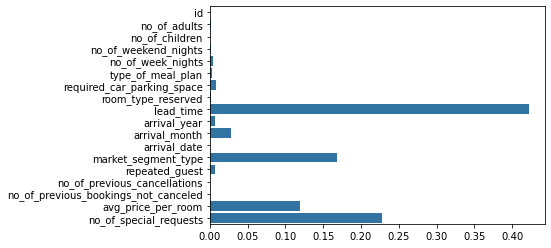

In [26]:
# TODO: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Initializing and training the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=10)
clf.fit(X_train, y_train)         # Hint: Fit the clasifier with training data

# TODO: Extracting feature importances
feature_importances = clf.feature_importances_

# Feature names
features = np.array(X.columns)

# TODO: Identifying the most important feature
most_important_feature = features[np.argmax(feature_importances)]

print(f"The most important feature is: {most_important_feature}")

sns.barplot(y= features, x=feature_importances)
plt.show()

#### Q2. Shrinkage Boosting

Context:
The learning rate in gradient boosting models is a crucial parameter that scales the contribution of each tree. It can significantly affect model performance by controlling how quickly the model adapts to the complex underlying patterns in the data.

Task:
Your task is to find the optimal learning rate for a Gradient Boosting Classifier applied to the Reservation Cancellation Dataset. This involves comparing the performance of models trained with different learning rates.

Question:
After evaluating Gradient Boosting Classifier models with different learning rates on the Reservation Cancellation Dataset, which learning rate yielded the highest accuracy on the test set?

In [28]:
# Define the learning rates to test
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]
best_accuracy = 0
best_learning_rate = 0

# TODO: Train a model for each learning rate and evaluate its accuracy

for lr in learning_rates: # Hint: iterate over all learning rates
    model = GradientBoostingClassifier(learning_rate=lr, random_state=10)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(lr, " : ", accuracy)

    if accuracy > best_accuracy:  # Hint: add the necessary condition
        best_accuracy = accuracy
        best_learning_rate = lr

print(f"The best learning rate is: {best_learning_rate} with an accuracy of: {best_accuracy}")

0.1  :  0.8042755344418052
0.05  :  0.8005938242280285
0.01  :  0.7859857482185273
0.005  :  0.7357482185273159
0.001  :  0.6086698337292161


#### Q3. Boosting Max Depth

Context:
The max_depth parameter in Gradient Boosting Classifier determines the maximum depth of the individual trees. Adjusting this parameter affects the model's complexity and its ability to capture the underlying patterns in the data, thus influencing performance.

Task:
Your task is to identify the optimal max_depth value that results in the highest accuracy for a Gradient Boosting Classifier applied to a dataset. This involves training and evaluating the classifier at various tree depths.

Question:
After training the Gradient Boosting Classifier at different tree depths and evaluating the models, which max_depth resulted in the highest accuracy on the test set?

In [ ]:
# WORKS WELL IN COLAB

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

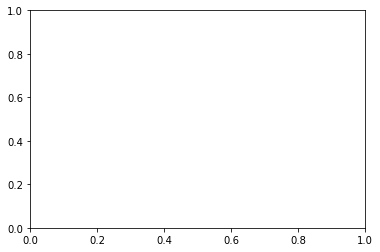

In [29]:
acc = []
best_depth = 0
best_acc = 0

# TODO: Train a model for each depth and evaluate its accuracy
for d in range(1,15):
    model = GradientBoostingClassifier(max_depth= d , random_state=10)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    acc.append(accuracy)

    if accuracy > best_acc:   # Hint: add the necessary condition
      best_acc = accuracy
      best_depth = d


# Create the line plot
sns.lineplot(x=range(1, 15), y=acc)

# Remove x-ticks
plt.xticks([])

# Add x-axis label
plt.title("Find the max_depth")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# Annotate the line at x = best_depth
highest_acc = acc[best_depth - 1]  # Adjusting for zero-based indexing
plt.axvline(x=best_depth, color='gray', linestyle='--')
plt.text(best_depth + 0.2, highest_acc, f"depth = {best_depth}", verticalalignment='center')

# Show the plot
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

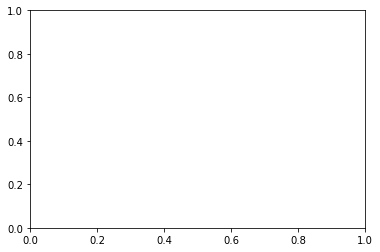

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


acc = []
dep = []
best_depth = 0
best_acc = 0

# Train a model for each depth and evaluate its accuracy
for d in range(1,15):
    model = GradientBoostingClassifier(max_depth= d , random_state=10)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    acc.append(accuracy)
    dep.append(dep)

    if accuracy > best_acc:
      best_acc = accuracy
      best_depth = d

import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
sns.lineplot(x=range(1, 15), y=acc)

# Remove x-ticks
plt.xticks([])

# Add x-axis label
plt.title("Find the max_depth")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')


# Annotate the line at x = 8
highest_acc = acc[best_depth - 1]  # Adjusting for zero-based indexing
plt.axvline(x=best_depth, color='gray', linestyle='--')
plt.text(best_depth + 0.2, highest_acc, f"depth = {best_depth}", verticalalignment='center')

# Show the plot
plt.show()

#### Q4. Scaling in Boosting

Context:
Feature scaling can significantly influence the performance of many machine learning algorithms, particularly those that are distance-based. However, decision trees and their ensembles (like Gradient Boosting) typically do not require feature scaling to perform effectively since they are not sensitive to the scale of the data.

Task:
Investigate whether scaling affects the performance of a Gradient Boosting Classifier by training two models: one with scaled features and one with original features.

After training and evaluating both models, what will be the output of 
- accuracy_with_scaled_data 
- accuracy_without_scaled_data?

In [31]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined
scaler = StandardScaler()

# TODO: Fit on training data and transform it
X_train_scaled = scaler.fit(X_train)

# TODO: Transform the test data
X_test_scaled = scaler.fit(X_test)

# TODO: Train and test the GBC on the Scaled data
model_with_scaled = GradientBoostingClassifier(random_state=10)
model_with_scaled.fit(X_train, y_train)
accuracy_with_scaled = accuracy_score(y_test, model_with_scaled.predict(X_test))

# TODO: Train and test the GBC on the Original data (unscaled)
model_without_scaled = GradientBoostingClassifier(random_state=10)
model_without_scaled.fit(X_train, y_train)
accuracy_without_scaled = accuracy_score(y_test, model_without_scaled.predict(X_test))

print(f"accuracy_with_scaled = {accuracy_with_scaled}")
print(f"accuracy_without_scaled = {accuracy_without_scaled}")

print(f"Difference in accuracy = {accuracy_with_scaled - accuracy_without_scaled}") # TODO:

accuracy_with_scaled = 0.8042755344418052
accuracy_without_scaled = 0.8042755344418052
Difference in accuracy = 0.0


#### Q5. Grid Search Boosting

Context:
Hyperparameter tuning is a critical step in optimizing machine learning models. Using GridSearchCV, you will tune the hyperparameters of a Gradient Boosting Classifier to find the combination that achieves the best performance on a given dataset.

Task:
Apply GridSearchCV to optimize a Gradient Boosting Classifier's hyperparameters on a split dataset. Determine the set of hyperparameters that results in the highest cross-validation performance.

Question:
After conducting the grid search, what are the optimal hyperparameters (Rank 1 parameters) discovered for the Gradient Boosting Classifier?

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8],
    'min_samples_split': [2, 4, 6]
}

In [32]:
from sklearn.model_selection import GridSearchCV


# Defining the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8],
    'min_samples_split': [2, 4, 6]
}

# Initializing the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=10)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid, scoring = "accuracy", cv=2, n_jobs = -1, verbose = 1)


# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

result = grid_search.cv_results_
for i in range(len(result["params"])):
  print(f"Parameters:{result['params'][i]} Mean_score: {result['mean_test_score'][i]} Rank: {result['rank_test_score'][i]}")

print(grid_search.best_estimator_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best parameters: {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 300}
Best cross-validation score: 0.8179334916864608
Parameters:{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100} Mean_score: 0.813687648456057 Rank: 8
Parameters:{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200} Mean_score: 0.8164786223277909 Rank: 6
Parameters:{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300} Mean_score: 0.8169833729216152 Rank: 5
Parameters:{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100} Mean_score: 0.8133907363420427 Rank: 9
Parameters:{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 200} Mean_score: 0.8174584323040379 Rank: 3
Parameters:{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 300} Mean_score: 0.8175475059382422 Rank: 2
Parameters:{'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 100} Mean_score: 0.814459619952494 Rank: 7
Parameters:{'max_depth': 5, 'm

#### Q6. Best for Test set

Context:
After optimizing the parameters for a Gradient Boosting Classifier using GridSearchCV, it's crucial to validate the effectiveness of these parameters beyond just cross-validation scores, specifically on a held-out test set.

Task:
Train multiple Gradient Boosting Classifier models using the top 5 ranked parameter sets from a previous GridSearchCV optimization. Evaluate each model's performance on a separate test set to determine which set achieves the highest accuracy.

Question:
After evaluating the test set accuracies for Gradient Boosting Classifiers trained with the top 5 parameter sets, what is the rank of the best performing model?

In [33]:
# TODO: Sort the scores and parameters by rank
sorted_indices = np.sort(result['rank_test_score'])
top_indices = sorted_indices[:5]  # Hint: Get top 5 indices

# TODO: Train a model for each of the top 5 parameter sets
for i in top_indices:
    params = result['params'][i]
    print(f"Training model number {i} with parameters: {params}")

    # TODO: Initialize and train the Gradient Boosting Classifier with the current set of parameters
    model = GradientBoostingClassifier(**params, random_state = 10)
    model.fit(X_train, y_train)

    # TODo: Evaluate the model on the test set
    score = model.score(X_test, y_test)
    print(f"Test score with parameters {params}: {score}\n")

Training model number 1 with parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Test score with parameters {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}: 0.8203087885985748

Training model number 2 with parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Test score with parameters {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}: 0.8214964370546318

Training model number 3 with parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}
Test score with parameters {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}: 0.8161520190023753

Training model number 4 with parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 200}
Test score with parameters {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 200}: 0.8203087885985748

Training model number 5 with parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 300}
Test score with parameters {'max_depth': 5, '

In [34]:
# Sort the scores and parameters by rank
sorted_indices = np.argsort(result['rank_test_score'])
top_indices = sorted_indices[:5]  # Get top 5 indices

# Train a model for each of the top 5 parameter sets
for i in top_indices:
    params = result['params'][i]
    print(f"Training model number {i} with parameters: {params}")

    # Initialize and train the Gradient Boosting Classifier with the current set of parameters
    model = GradientBoostingClassifier(**params, random_state = 10)
    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    score = model.score(X_test, y_test)
    print(f"Test score with parameters {params}: {score}\n")

Training model number 8 with parameters: {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 300}
Test score with parameters {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 300}: 0.8241092636579572

Training model number 5 with parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 300}
Test score with parameters {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 300}: 0.8242280285035629

Training model number 4 with parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 200}
Test score with parameters {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 200}: 0.8203087885985748

Training model number 7 with parameters: {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 200}
Test score with parameters {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 200}: 0.8207838479809976

Training model number 2 with parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Test score with parameters {'max_depth': 5, '

In [35]:
0.8242280285035629 > 0.8214964370546318

True

#### Q7. Outliers in Boosting

Context:
Outliers can significantly influence the performance of machine learning models, especially those not robust to extreme variations. Identifying outliers in training data helps in understanding their potential impact and deciding whether they should be treated or left as is.

Task:
Determine the number of outliers in the 'lead_time' feature of the training dataset, based on specified percentile thresholds.

Question:
Based on the 'lead-time' feature, how many outliers are present in the X_train set after splitting the dataset?

In [46]:
# TODO: Determine the 1th and 99th percentiles for 'lead_time'
low_threshold, high_threshold = np.percentile(X_train['lead_time'], [1, 99])  # Hint: Use the numpy function to calculate percentiles. Remember to specify the percentile values as a list.

# Identify the indices of rows that are not considered outliers
not_outliers = X_train['lead_time'].between(low_threshold, high_threshold)   # Hint: Use a comparison operation to generate a boolean mask where values are between the low and high thresholds.

# Count the number of outliers
num_outliers = np.shape(X_train[~not_outliers])

print(num_outliers)

(334, 18)


In [45]:
X_train[~not_outliers]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
28506,28506,2,0,1,2,0,0,0,418,2018,9,26,1,0,0,0,75.00,0
460,460,2,0,0,2,2,0,0,377,2018,10,14,0,0,0,0,115.00,1
1547,1547,1,0,0,2,2,0,0,377,2018,10,14,0,0,0,0,90.00,0
32528,32528,1,0,2,0,0,0,0,386,2018,10,23,0,0,0,0,115.00,0
18522,18522,2,0,0,2,2,0,0,346,2017,9,13,1,0,0,0,115.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35897,35897,2,2,0,5,0,0,3,326,2018,12,23,1,0,0,0,158.40,2
31821,31821,2,0,0,2,2,0,0,346,2018,9,15,0,0,0,0,115.00,1
2207,2207,2,0,1,3,0,0,0,418,2018,9,26,0,0,0,0,75.00,0
25235,25235,2,0,1,2,0,0,0,418,2018,6,26,0,0,0,0,75.00,0


#### Q8. Outliers in Boosting II

Context:
Outlier removal can potentially improve the performance of machine learning models by reducing noise and anomalies that can mislead the training process. This task involves assessing the effect of outlier removal on the accuracy of a Gradient Boosting Classifier.

Task:
Train a Gradient Boosting Classifier on a dataset from which outliers have been removed and compare its performance with a model trained on the original dataset.

Question:
After removing outliers based on the 'lead_time' feature and training a new Gradient Boosting Classifier, what is the impact on the model's accuracy when evaluated on X_test?

In [48]:
# TODO: Train on the original dataset
original_clf = GradientBoostingClassifier(random_state=10)
original_clf.fit(X_train, y_train)
original_predictions = original_clf.predict(X_test)
original_accuracy = accuracy_score(y_test, original_predictions)
print(f"Original dataset accuracy: {original_accuracy}")

# TODO: Filter the training data to remove outliers
X_train_no_outliers = X_train[not_outliers]
y_train_no_outliers = y_train[not_outliers]

# Ensure there is data after removing outliers
if len(X_train_no_outliers) == 0:
    print("No data left after removing outliers based on 'lead_time'. Consider adjusting the percentile thresholds.")
else:
    # TODO: Train on the dataset without outliers
    clf_no_outliers = GradientBoostingClassifier(random_state=10)
    clf_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
    no_outliers_predictions = clf_no_outliers.predict(X_test)
    no_outliers_accuracy = accuracy_score(y_test, no_outliers_predictions)
    print(f"Dataset without outliers (based on 'lead_time') accuracy: {no_outliers_accuracy}")

    # TODO: Compare the performance
    if no_outliers_accuracy > original_accuracy:          # Hint: add the necessary condition
        print("Removing outliers based on 'lead_time' improved the model's accuracy.")
    else:
        print("Removing outliers based on 'lead_time' did not improve the model's accuracy.")

Original dataset accuracy: 0.8042755344418052
Dataset without outliers (based on 'lead_time') accuracy: 0.8065320665083135
Removing outliers based on 'lead_time' improved the model's accuracy.


#### Q9. Loss in Boosting

Context:
The choice of loss function in a Gradient Boosting Classifier can influence its performance. Typically, "log loss" is used for classification, but "exponential" loss, which leads to a model similar to AdaBoost, can also be used.

Task:
Evaluate the performance impact of different loss functions in a Gradient Boosting Classifier. Train two versions of the classifier on the same dataset: one using the default "log loss" loss function and another using the "exponential" loss function, then compare their accuracies.

Question:
How does the accuracy of the Gradient Boosting Classifier using the exponential loss function compare to the model using the default log_loss function when evaluated on X_test?

In [51]:
# TODO: Train a Gradient Boosting Classifier using the default loss function (which is 'log_loss')
clf_log_loss = GradientBoostingClassifier( random_state=10)       # default = 'log_loss'
clf_log_loss.fit(X_train, y_train)
predictions_log_loss = clf_log_loss.predict(X_test)
accuracy_log_loss = accuracy_score(y_test, predictions_log_loss)
print(f"Accuracy with the 'log_loss' loss function: {accuracy_log_loss}")

# TODO: Train a Gradient Boosting Classifier using the 'exponential' loss function
clf_exponential = GradientBoostingClassifier(loss='exponential', random_state=10)
clf_exponential.fit(X_train, y_train)
predictions_exponential = clf_exponential.predict(X_test)
accuracy_exponential = accuracy_score(y_test, predictions_exponential)
print(f"Accuracy with the 'exponential' loss function: {accuracy_exponential}")

# Compare the accuracies
if accuracy_exponential > accuracy_log_loss:
    print("The 'exponential' loss function model is more accurate on the test set.")
elif accuracy_exponential < accuracy_log_loss:
    print("The 'log_loss' loss function model is more accurate on the test set.")
else:
    print("Both models have the same accuracy on the test set.")

Accuracy with the 'log_loss' loss function: 0.8042755344418052
Accuracy with the 'exponential' loss function: 0.8057007125890736
The 'exponential' loss function model is more accurate on the test set.


#### Q10. Estimators in Boosting

Context:
In Gradient Boosting, the number of weak learners (trees) is a crucial hyperparameter. It controls the complexity of the model and can significantly impact its performance. Observing how the model's accuracy evolves with the addition of more trees can provide insights into its learning dynamics and potential overfitting.

Task:
Train a series of Gradient Boosting Classifiers with an increasing number of estimators to evaluate how the addition of trees affects the test accuracy on a given dataset.

Question:
How does the addition of more weak learners (trees) affect the test accuracy of the Gradient Boosting Classifier?

Accuracy with 1 estimators: 0.6086698337292161
Accuracy with 5 estimators: 0.7355106888361045
Accuracy with 10 estimators: 0.7858669833729216
Accuracy with 20 estimators: 0.7891923990498813
Accuracy with 50 estimators: 0.8002375296912114
Accuracy with 100 estimators: 0.8042755344418052
Accuracy with 200 estimators: 0.8111638954869359
Accuracy with 300 estimators: 0.8157957244655581
Accuracy with 500 estimators: 0.8193586698337292
Accuracy with 1000 estimators: 0.8258907363420428
Accuracy with 1000 is more.


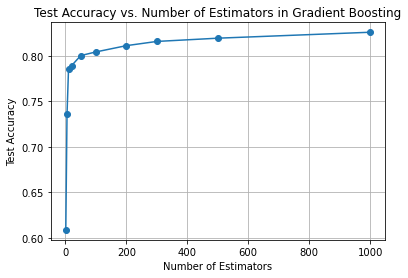

In [54]:
# Initialize the number of estimators
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 300, 500, 1000]
test_accuracies = []

# TODO: Train and evaluate the model with different numbers of weak learners
for n_estimators in n_estimators_list:
    clf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=10)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    test_accuracies.append(accuracy)
    print(f"Accuracy with {n_estimators} estimators: {accuracy}")
max_accuracy = np.argmax(test_accuracies)
print("Accuracy with", n_estimators_list[max_accuracy],'is more.')

# Plotting the test accuracies
plt.plot(n_estimators_list, test_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Estimators in Gradient Boosting')
plt.grid(True)
plt.show()

### ML: Other Ensemble Techniques - 2

In [8]:
pip install xgboost

#### Q1

Context:
XGBoost and Gradient Boosting Classifier (GBC) are both powerful ensemble machine learning algorithms based on boosting. While both aim to sequentially correct errors of weak learners, they are implemented differently and may have variations in performance, training speed, and memory usage.

Task:
Train both an XGBoost model and a Gradient Boosting Classifier on a dataset, then compare their training time and the file sizes of the saved models to determine which model is more efficient in terms of speed and storage.

Question:
After performing the training and saving the models, which of the following statements is correct regarding the performance and efficiency of XGBoost and GBC?

In [9]:
import time
import pickle
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

import os

# TODO: Train XGBoost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


start_time = time.time()
xgb_model = XGBClassifier(random_state=10)
xgb_model.fit(X_train, y_train)
xgb_train_time = time.time() - start_time

# Save XGBoost model
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# TODO: Train GBC
start_time = time.time()
gbc_model = GradientBoostingClassifier(random_state=10)
gbc_model.fit(X_train, y_train)
gbc_train_time = time.time() - start_time

# Save GBC model
with open('gbc_model.pkl', 'wb') as file:
    pickle.dump(gbc_model, file)

# Output the training times
print(f"XGBoost training time: {xgb_train_time} seconds")
print(f"GBC training time: {gbc_train_time} seconds")

# Check the file sizes
xgb_file_size = os.path.getsize('xgb_model.pkl')
gbc_file_size = os.path.getsize('gbc_model.pkl')

# Output the file sizes
print(f"XGBoost model file size: {xgb_file_size} bytes")
print(f"GBC model file size: {gbc_file_size} bytes")

XGBoost training time: 0.5157487392425537 seconds
GBC training time: 7.058883905410767 seconds
XGBoost model file size: 376128 bytes
GBC model file size: 123990 bytes


#### Q2

Context:
Understanding how different boosting algorithms prioritize features and their prediction accuracy is crucial when choosing a model for deployment. This task involves evaluating XGBoost and Gradient Boosting Classifier (GBC) to determine which model performs better in terms of accuracy and how they compare in terms of identifying the most important features.

Task:
Train both XGBoost and a Gradient Boosting Classifier on the Reservation Booking Status dataset, evaluate their accuracy on the test set, and compare the most important features identified by each model.

Question:
After evaluating both models on the test set and assessing the most important features, which of the following statements is correct?

In [10]:
xgb_model.feature_importances_

array([0.01231491, 0.02109817, 0.01387481, 0.01625015, 0.01604698,
       0.0205303 , 0.12732057, 0.02194238, 0.08333495, 0.04457436,
       0.03087396, 0.01300558, 0.21750169, 0.10644807, 0.        ,
       0.01180213, 0.0398908 , 0.20319018], dtype=float32)

XGBoost accuracy: 0.8273159144893112
Most important feature in XGBoost: market_segment_type
GBC accuracy: 0.8042755344418052
Most important feature in GBC: lead_time


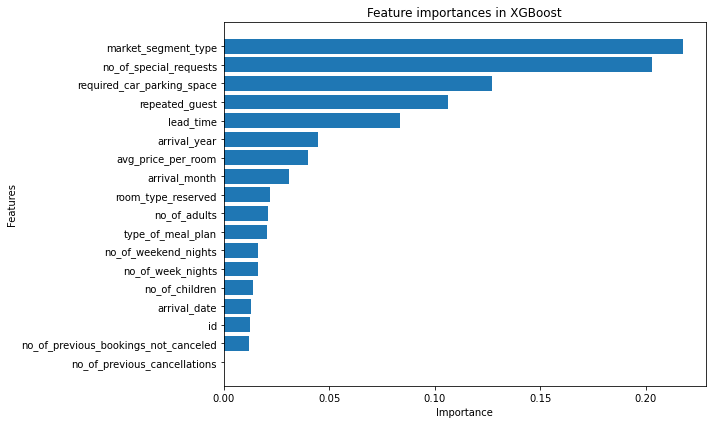

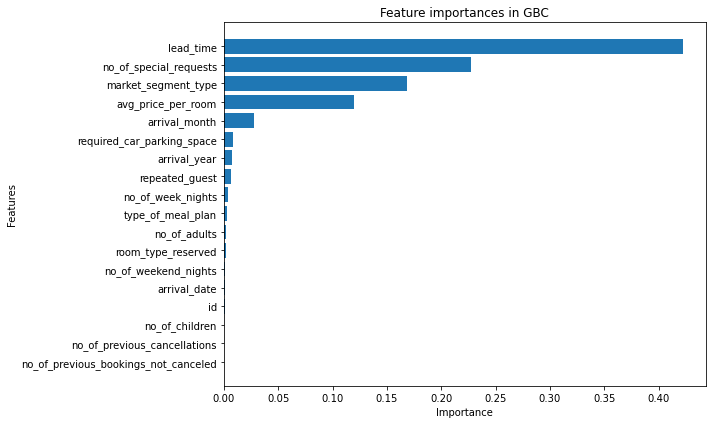

In [13]:
# Evaluate XGBoost on the test set
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost accuracy: {xgb_accuracy}")

# Determine the most important feature in XGBoost
xgb_feature_importances = xgb_model.feature_importances_
xgb_most_important_feature = X.columns[xgb_feature_importances.argmax()]
print(f"Most important feature in XGBoost: {xgb_most_important_feature}")

# Instantiate and train GBC
gbc_model = GradientBoostingClassifier(random_state=10)
gbc_model.fit(X_train, y_train)

# Evaluate GBC on the test set
gbc_predictions = gbc_model.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predictions)
print(f"GBC accuracy: {gbc_accuracy}")

# Determine the most important feature in GBC
gbc_feature_importances = gbc_model.feature_importances_
gbc_most_important_feature = X.columns[gbc_feature_importances.argmax()]
print(f"Most important feature in GBC: {gbc_most_important_feature}")

import matplotlib.pyplot as plt

# Feature importance for XGBoost
xgb_importances = xgb_model.feature_importances_
indices_xgb = np.argsort(xgb_importances)

plt.figure(figsize=(10, 6))
plt.title("Feature importances in XGBoost")
plt.barh(range(X_train.shape[1]), xgb_importances[indices_xgb], align="center")
plt.yticks(range(X_train.shape[1]), X.columns[indices_xgb])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Feature importance for GBC
gbc_importances = gbc_model.feature_importances_
indices_gbc = np.argsort(gbc_importances)

plt.figure(figsize=(10, 6))
plt.title("Feature importances in GBC")
plt.barh(range(X_train.shape[1]), gbc_importances[indices_gbc], align="center")
plt.yticks(range(X_train.shape[1]), X.columns[indices_gbc])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#### Q3

Context:
XGBoost and LightGBM are both popular gradient boosting frameworks that are widely used due to their performance and speed. Comparing these two models on the same dataset can provide valuable insights into their efficiency and effectiveness in predictive accuracy.

Task:
Train both XGBoost and LightGBM models using default parameters on the Reservation Booking Status dataset. Record and compare their training times and accuracies.

Question:
After training both models and evaluating them on the test set, which of the following statements is true?

In [15]:
pip install lightgbm

In [19]:
pip install --upgrade pandas "dask[complete]"


  Attempting uninstall: locket
    Found existing installation: locket 0.2.1
    Uninstalling locket-0.2.1:
      Successfully uninstalled locket-0.2.1
  Attempting uninstall: partd
    Found existing installation: partd 1.2.0
    Uninstalling partd-1.2.0:
      Successfully uninstalled partd-1.2.0
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
  Attempting uninstall: zict
    Found existing installation: zict 2.0.0
    Uninstalling zict-2.0.0:
      Successfully uninstalled zict-2.0.0
  Attempting uninstall: dask
    Found existing installation: dask 2022.2.1
    Uninstalling dask-2022.2.1:
      Successfully uninstalled dask-2022.2.1
  Attempting uninstall: distributed
    Found exist

In [20]:
from lightgbm import LGBMClassifier

# Train XGBoost
start_time = time.time()
xgb_model = XGBClassifier(random_state=10)
xgb_model.fit(X_train, y_train)
xgb_train_time = time.time() - start_time
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Train LightGBM
start_time = time.time()
lgb_model = LGBMClassifier(random_state=10)
lgb_model.fit(X_train, y_train)
lgb_train_time = time.time() - start_time
lgb_predictions = lgb_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)

# Output the results
print(f"XGBoost training time: {xgb_train_time} seconds")
print(f"XGBoost test accuracy: {xgb_accuracy}")
print(f"LightGBM training time: {lgb_train_time} seconds")
print(f"LightGBM test accuracy: {lgb_accuracy}")

C:\Users\SOURABH\anaconda3\lib\site-packages\dask\dataframe\_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 10.0.1. Please consider upgrading.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13209, number of negative: 20471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 33680, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392191 -> initscore=-0.438111
[LightGBM] [Info] Start training from score -0.438111
XGBoost training time: 0.4096870422363281 seconds
XGBoost test accuracy: 0.8273159144893112
LightGBM training time: 0.5505962371826172 seconds
LightGBM test accuracy: 0.8184085510688837


#### Q5

Context:
Stacking and voting are two ensemble techniques used to improve machine learning predictions by combining the strengths of multiple models. This task will explore their efficacy by using them in a classification problem with several popular algorithms as base learners.

Task:
Implement a stacking ensemble model and a voting ensemble model using the same base learners on the Reservation Booking Status dataset. Compare the accuracy of these two ensemble methods on the test set.

Question:
After implementing and evaluating both the stacking ensemble model with XGBoost as the meta-learner and the voting ensemble model, how do their accuracies compare on the test set?

In [22]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score


# Initialize the base learners
rf = RandomForestClassifier(random_state=10)
gbc = RandomForestClassifier(random_state=10)
xgb = XGBClassifier(random_state=10)
lgbm = LGBMClassifier(random_state=10)
ada = AdaBoostClassifier(random_state=10)

# Initialize the Stacking Classifier using XGBoost as meta-learner
stacking_clf = StackingClassifier(classifiers=[rf, gbc, lgbm, ada],
                                  meta_classifier=xgb,
                                  use_probas=True,
                                  average_probas=False)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking model
stacking_predictions = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("---"*10)
print(f"Stacking Model Accuracy: {stacking_accuracy}")
print("---"*10)

# Initialize the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('gbc', gbc), ('xgb', xgb), ('lgbm', lgbm), ('ada', ada)
])

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the voting model
voting_predictions = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print("---"*10)
print(f"Voting Model Accuracy: {voting_accuracy}")

# Compare the accuracies
print("---"*10)
if stacking_accuracy > voting_accuracy:
    print("Stacking ensemble is more accurate.")
elif stacking_accuracy < voting_accuracy:
    print("Voting ensemble is more accurate.")
else:
    print("Both ensembles have the same accuracy.")
print("---"*10)

[LightGBM] [Info] Number of positive: 13209, number of negative: 20471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 33680, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392191 -> initscore=-0.438111
[LightGBM] [Info] Start training from score -0.438111
------------------------------
Stacking Model Accuracy: 0.8149643705463183
------------------------------
[LightGBM] [Info] Number of positive: 13209, number of negative: 20471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightG

#### Q6

Context:
Cascading models involve a sequential application of models where the output of one model feeds into the next. This technique can help focus a more complex model on the harder cases that a simpler model struggles with, potentially improving overall prediction accuracy.

Task:
Create a two-stage cascading boosting model where the first stage uses a LightGBM classifier to preprocess the data, and the second stage trains an XGBoost classifier on instances for which the first model had lower confidence. Evaluate the final model's performance on the entire test set.

Question:
After implementing the cascading model where the first stage is a LightGBM classifier and the second stage is an XGBoost classifier trained on filtered instances, what is the accuracy of the final XGBoost model on the entire test set?

In [24]:
lgb_clf = LGBMClassifier(random_state=10)
lgb_clf.fit(X_train, y_train)

# TODO: Get the prediction probabilities for the training set and testing set
lgb_train_prob = lgb_clf.predict_proba(X_train)[:, 1]   # Hint: we want probabilities not the predictions
lgb_test_prob = lgb_clf.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 13209, number of negative: 20471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 33680, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392191 -> initscore=-0.438111
[LightGBM] [Info] Start training from score -0.438111


In [27]:
len(lgb_test_prob)

8420

In [ ]:
# <Answer should be this>

In [26]:
# TODO: Layer 1: Train a LightGBM classifier
lgb_clf = LGBMClassifier(random_state=10)
lgb_clf.fit(X_train, y_train)

# TODO: Get the prediction probabilities for the training set and testing set
lgb_train_prob = lgb_clf.predict_proba(X_train)[:, 1]   # Hint: we want probabilities not the predictions
lgb_test_prob = lgb_clf.predict_proba(X_test)[:, 1]

# Filter out instances with confidence above 75% and below 25%
filter_threshold = 0.75

# TODO: Filter the DataFrame based on the LightGBM model's prediction probabilities above 75% and below 25%
filtered_train_df = X_train[(lgb_train_prob < 0.75) | (X_train > (0.25))]
filtered_y_train = y_train[(lgb_train_prob < filter_threshold) | (lgb_train_prob > (1 - filter_threshold))]

# TODO: Layer 2: Train a XGBoost classifier on the filtered training set
xgb_clf = XGBClassifier(random_state=10)
xgb_clf.fit(filtered_train_df, filtered_y_train)

# TODO: Make final predictions on the  test set with the XGBoost model
final_predictions = xgb_clf.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Model Accuracy on Filtered Test Set: {final_accuracy}")

[LightGBM] [Info] Number of positive: 13209, number of negative: 20471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 33680, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392191 -> initscore=-0.438111
[LightGBM] [Info] Start training from score -0.438111


ValueError: Unable to coerce to Series, length must be 18: given 33680

In [ ]:
# <Given answer in assessment>

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Layer 1: Train a LightGBM model
lgb = lgb.LGBMClassifier(random_state=10)
lgb.fit(X_train, y_train)

# Use the predictions of the first layer as features for the second layer
X_train_layer2 = np.column_stack((X_train, lgb.predict_proba(X_train)[:, 1]))
X_test_layer2 = np.column_stack((X_test, lgb.predict_proba(X_test)[:, 1]))

# Layer 2: Train a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=10)
gbc.fit(X_train_layer2, y_train)

# Evaluate the final model
final_predictions = gbc.predict(X_test_layer2)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Cascading Model Accuracy: {final_accuracy}")

[LightGBM] [Info] Number of positive: 13209, number of negative: 20471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 33680, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392191 -> initscore=-0.438111
[LightGBM] [Info] Start training from score -0.438111
Cascading Model Accuracy: 0.8224465558194775


In [30]:
X_train_layer2.shape

(33680, 19)

In [31]:
X_train.shape

(33680, 18)

In [32]:
lgb.predict_proba(X_train)

array([[0.54237183, 0.45762817],
       [0.88975698, 0.11024302],
       [0.84727033, 0.15272967],
       ...,
       [0.97970163, 0.02029837],
       [0.20375458, 0.79624542],
       [0.5924415 , 0.4075585 ]])

In [34]:
lgb.predict_proba(X_train).shape

(33680, 2)

In [33]:
lgb.predict_proba(X_train)[:, 1]

array([0.45762817, 0.11024302, 0.15272967, ..., 0.02029837, 0.79624542,
       0.4075585 ])

In [42]:
X_train[(lgb.predict_proba(X_train)[:, 1] < 0.75) & (lgb.predict_proba(X_train)[:, 1] > 0.25)]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
6483,6483,2,0,0,2,0,0,4,24,2018,7,1,1,0,0,0,142.00,0
30903,30903,1,0,1,1,0,0,0,19,2018,10,19,2,0,0,0,159.00,0
33845,33845,2,1,2,0,0,0,0,61,2018,7,25,1,0,0,0,121.50,1
26092,26092,1,0,0,1,0,0,0,99,2018,2,30,2,0,0,0,81.00,0
17299,17299,1,0,1,3,0,0,0,118,2018,6,15,0,0,0,0,110.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28712,28712,3,0,2,2,0,0,3,17,2018,10,2,1,0,0,0,153.62,1
9289,9289,3,0,2,0,0,0,1,96,2018,7,3,1,0,0,0,146.70,1
16241,16241,2,0,0,4,0,0,0,183,2018,10,29,1,0,0,0,80.10,2
9372,9372,2,0,0,4,0,0,1,92,2018,8,2,1,0,0,0,150.30,1


In [38]:
len(lgb_train_prob > 0.25)

33680

#### Q2

Given the data (X and y), use sklearn's stacking for the regression model for firstly, training all the models individually, and then, training the stacked regressor.

In this question, we are using KNN and decision tree for the level 0 models and linear regression for the meta-model.

Note: All required dependencies have been imported already.

Two lists are taken as input X and y

The mean of cross-validation scores for each model is printed

In [43]:
X = [[-0.12289022551864817, -0.9357694342590688], [0.5129298204180088, -0.29809283510271567], [0.48851814653749703, -0.07557171302105573], [-0.2678880796260159, 0.530355466738186], [-1.1006191772129212, 1.1447237098396141], [-1.4441138054295894, -0.5044658629464512], [0.8389834138745049, 0.9311020813035573], [-0.17242820755043575, -0.8778584179213718], [0.2300947353643834, 0.7620111803120247], [-0.671246130836819, -0.01266459891890136], [-0.6871727001195994, -0.8452056414987196], [0.31903909605709857, -0.2493703754774101], [-0.691660751725309, -0.39675352685597737], [-0.7471582937508376, 1.6924546010277466], [1.6598021771098705, 0.7420441605773356], [-0.6200008439481293, 0.6980320340722189], [-0.3752849500901142, -0.6387304074542224], [-0.3062040126283718, 0.8279746426072462], [-0.3224172040135075, -0.38405435466841564], [1.74481176421648, -0.7612069008951028], [0.8654076293246785, -2.3015386968802827], [0.12015895248162915, 0.6172031097074192], [-0.22232814261035927, -0.20075806892999745], [-0.7543979409966528, 1.2528681552332879], [1.6243453636632417, -0.6117564136500754], [-1.1173103486352778, 0.23441569781709215], [-0.5281717522634557, -1.0729686221561705], [0.9015907205927955, 0.5024943389018682], [0.4234943540641129, 0.07734006834855942], [0.3001703199558275, -0.35224984649351865], [-0.19183555236161492, -0.8876289640848363], [0.04221374671559283, 0.5828152137158222], [0.16003706944783047, 0.8761689211162249], [0.19829972012676975, 0.11900864580745882], [1.131629387451427, 1.5198168164221988], [2.1855754065331614, -1.3964963354881377], [1.462107937044974, -2.060140709497654], [1.198917879901507, 0.18515641748394385], [0.1865613909882843, 0.4100516472082563], [0.19091548466746602, 2.100255136478842], [1.1337694423354374, -1.0998912673140309], [-0.6706622862890306, 0.3775637863209194], [-1.1425181980221402, -0.3493427224128775], [-0.3438536755710756, 0.04359685683424694], [0.9008559492644118, -0.6837278591743331], [-0.2088942333747781, 0.5866231911821976], [0.05080775477602897, -0.6369956465693534], [0.31563494724160523, -2.022201215824003], [0.12182127099143693, 1.1294839079119197], [0.2855873252542588, 0.8851411642707281]] 
y = [-46.34457583853899, 29.89203815293042, 36.57670478050099, -1.0548543507733465, -44.34760203047087, -136.23585513274503, 103.81048050179038, -48.10275508775748, 48.11630577045144, -54.62694386929622, -88.13212433240432, 16.15177140411067, -71.37438371388818, 5.53682925172843, 162.66695252711517, -23.210158588999548, -55.040032571465225, 7.3813358866864425, -40.945038837952694, 111.31738238616813, -19.52961992002634, 33.79973612507111, -25.64394667923562, -12.417030626190087, 107.41448375249622, -81.08909809239485, -84.1858887757812, 92.17168168963711, 37.248421360886816, 10.59831841709924, -49.78340567852572, 26.043717785494916, 46.98000533279682, 20.673696974050426, 150.21975566743365, 122.28638742509285, 38.00737094940657, 104.00861175886935, 31.03679755941446, 96.99313535634106, 48.849928674845266, -39.47151812217092, -105.88279350591996, -26.092669988864273, 46.22449353100841, 5.979177298086575, -20.791632075145184, -52.9535092860866, 53.64827578648195, 57.32065154495446]

In [48]:
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor



X = X
y = y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))

	# define meta learner model, it'll be a linear regression model
	level1 = LinearRegression()
	
	# define the stacking ensemble for regression with level0 and meta model
	model = StackingRegressor(estimators=level0, final_estimator=level1)
	
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	
	#intialize the object for knn for regression
	models['knn'] = KNeighborsRegressor()
	
	#intialize the object for decision tree for regression
	models['cart'] = DecisionTreeRegressor()
	models['stacking'] = get_stacking()
	
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):

    #initialize RepeatedKfold object with k = 10 and 3 repetitions
	cv = RepeatedKFold(n_splits=10, n_repeats=3)
	
	# evaluate the model using r2 and the above cross validation strategy
	scores = cross_val_score(model, X, y, scoring='r2', cv = cv)
	
	return scores


# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in sorted(models.items()):
	scores = evaluate_model(model, X, y)
	results.append(scores)
	print('%s %.3f' % (name, np.mean(scores)))

cart 0.641
knn 0.830
stacking 0.811
